<a href="https://colab.research.google.com/github/Ambaright/ST-554-Project1/blob/main/ST554_Project1_Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 1: Task 1 - Gradient Descent Algorithms
##Introduction
The increasing incidence of respiratory illness and the known carcinogenic risks associated with prolonged exposure to pollutants like benzene (C6H6) have made precise urban air quality monitoring a critical priority for public health and municipal traffic management. Currently, urban monitoring relies on sparse networks of fixed stations equipped with high-precision industrial spectrometers; however, the high cost and significant size of these instruments prevent the deployment of a monitoring mesh dense enough to capture the complex, turbulent diffusion of gases in a city environment. To address this gap, research has shifted toward low-cost gas multi-sensor devices, often termed "electronic noses," which utilize solid-state sensors to provide a more granular view of urban pollution.

The provided report examines data from a 13-month measurement campaign (March 2004 to April 2005) conducted along a high-traffic road in an Italian city. The study’s primary objective was to evaluate the feasibility of using these low-cost devices to "densify" existing monitoring networks by comparing their readings against "Ground Truth" (GT) reference data provided by a conventional monitoring station. The dataset includes hourly mean concentrations for several "true" pollutants - CO, NMHC, C6H6, NOx, and NO2 - recorded alongside the responses of five metal oxide chemoresistive sensors (targeted at CO, NMHC, NOx, NO2, and O3) and two sensors for weather-related variables, specifically temperature (T), relative humidity (RH), and absolute humidity (AH).

A central focus of this analysis is the estimation of grount truth C6H6(benzene). Notably, the multi-sensor device used in the study did not include a sensor specifically targeted at benzene. Instead, the study aimed to reconstruct benzene levels by employing artificial neural networks to exploit the significant linear correlations that exist between different urban pollutants. For instance, a very strong correlation coefficient of 0.98 was observed between benzene and Non-Metanic Hydrocarbons (NMHC).

Furthermore, the study investigates the critical role of atmospheric dynamics, as the stability and selectivity of solid-state sensors are heavily influenced by seasonal changes and weather variables. Earlier findings suggest that sensor performance can be impacted by rapid shifts in humidity and low temperatures, which may necessitate periodic re-calibration to account for sensor drift and changing gas mixture ratios in the winter.

In this study, data from these environmental sensors is utilized to model the linear relationship between benzene (C6H6) and levels of other atmospheric pollutants. In order to find the ideal linear relationship parameters, we need to quantify the quality of predictions made by them. We can do this by using a loss function. A popularly utlized loss function for model fitting is the squared error loss and root mean squared error. The squared error loss represents the error between a single predicted value and its associated observed value. For a given set of data, we then consider the root mean squared error (rmse), which averages the squared error for each data point. When making predictions for atmospheric benzene levels, we want to choose predictions that minimize the rmse and therefore provide predictions closer to observed values.

To look for linear parameters that minimize the loss function, we can use gradient descent algorithms. Gradient descent algorithms are a first-order iterative optimization technique used to find a local minimum of a differentiable function. In the realm of modeling data and fitting linear relationships between C6H6 and other environmental factors, gradient descent is a fundamental method of model training wherein the loss function is minimized, thereby reducing the error between the models predictions and the observed data.

Two gradient descent approaches are taken in this study. The grid search algorithm is known as a brute force method in which generated predicted values or generated intercept and slope values are compared to observed values to determine either the ideal predicted value or intercept and slope. In the gradient descent method, the derivative of the function is taken to determine the slope and therefore the direction of the minimum of the loss function. Small steps are then taken in the direction of the minimum unitl a tolerance level is reached to determine the ideal predicted values or intercept and slope of the linear model.

## Reading in and Cleaning the Data
Before coding our gradient descent algorithms, we must first read in our dataset and ensure it is in a useable format. The dataset used for this study is made available by the University of California, Irvine. From the total dataset, a pandas dataframe of the important information is obtained and stored as `air_quality_df`.  

In [39]:
#install ucimlrepo and import other neceassry modules
!pip install ucimlrepo
import pandas as pd
import ucimlrepo as uci
import numpy as np

In [40]:
#extract important data from Air Quality dataset
air_quality = uci.fetch_ucirepo(id=360)
air_quality_df = air_quality['data']['original']

By calling the `.head()` method on our dataframe, we see that there are several factors being measured such as gold standard measurements for benzene (C6H6) which is the variable we would like to preduct, along with gold standard measurements for carbon monoxide (CO) and measurements obtained from the sensors. The `.info()` and `.describe()` methods tell us how the data in each column is stored and what the spread of the data is. This is useful when determining which steps to take in our grid search and gradient descent algorithms.

In [41]:
air_quality_df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,3/10/2004,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,3/10/2004,19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,3/10/2004,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,3/10/2004,21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888


In [42]:
air_quality_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   int64  
 4   NMHC(GT)       9357 non-null   int64  
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   int64  
 7   NOx(GT)        9357 non-null   int64  
 8   PT08.S3(NOx)   9357 non-null   int64  
 9   NO2(GT)        9357 non-null   int64  
 10  PT08.S4(NO2)   9357 non-null   int64  
 11  PT08.S5(O3)    9357 non-null   int64  
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(5), int64(8), object(2)
memory usage: 1.1+ MB


In [43]:
air_quality_df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604
std,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


In this dataset, missing values are assigned a value -200. To remove these values, we first utilize the `.replace()` method to replace all instances of -200 with NaN. We then use the `.dropna()` method to remove instances of NaN from the dataset.

In [44]:
air_quality_df.replace(-200, np.nan, inplace = True)
air_quality_df.dropna(inplace = True)

Calling `.describe()` on the new dataframe shows that the minimum value for each variable is no longer -200, showing that missing values have been dropped from the dataset.

In [45]:
air_quality_df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000
mean,2.353567,1207.879081,231.025393,10.771100,966.116082,143.501814,963.297461,100.259976,1600.620314,1045.812576,15.601451,49.050181,0.831853
std,1.409496,241.816997,208.461912,7.418134,266.424557,81.829717,265.914168,31.493823,302.291793,400.134662,4.825304,15.266746,0.178506
min,0.300000,753.000000,7.000000,0.500000,448.000000,12.000000,461.000000,19.000000,955.000000,263.000000,6.300000,14.900000,0.402300
25%,1.300000,1017.000000,77.000000,4.800000,754.000000,81.000000,769.000000,78.500000,1369.500000,760.000000,11.900000,36.700000,0.718950
50%,2.000000,1172.000000,157.000000,9.100000,944.000000,128.000000,920.000000,99.000000,1556.000000,1009.000000,15.000000,49.600000,0.817700
75%,3.100000,1380.000000,318.500000,14.800000,1142.500000,187.000000,1131.000000,122.000000,1783.500000,1320.000000,18.300000,60.550000,0.927500
max,8.100000,2040.000000,1189.000000,39.200000,1754.000000,478.000000,1935.000000,196.000000,2679.000000,2359.000000,30.000000,83.200000,1.485200


We can use the `.head()` method to take a second look at our air_quality_df dataframe too make sure that the values make sense and that the indicies have also been updated properly after dropping missing values.

In [46]:
air_quality_df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,3/10/2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,3/10/2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,3/10/2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,3/10/2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


Below, we create a boxplot for the C6H6(GT) variable to understand its distribution. Using information from this boxplot and from the `.describe()` method, we know that the first quartile and third quartiles of the C6H6(GT) variable are 4.6 and 14.3 respectively. This information is especially useful when generating predicted y values to test with our grid search algorithms.

<Axes: >

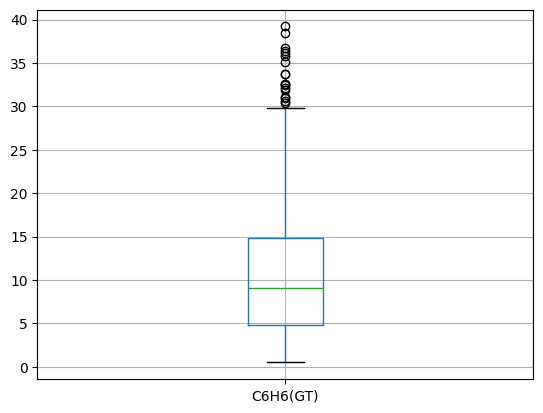

In [47]:
air_quality_df.boxplot(column = 'C6H6(GT)')

## Calculating the Root Mean Squared Error
Below are two methods for calculating the root mean squared error. The function `rmse_y` calculates the root mean squared error between a single predicted y value, notified by the letter c, and a series of observed y values.

In the function `rmse_xy`, predicted values for the y-intercept (b0) and slope (b1) are passed into the function and used to generate a predicted y value for a given x value. The rmse is then calculated for a given series of x and y values.

In [48]:
def rmse_y(y_observed, c):
  """
  Calculate the root means squared error between a predicted y-value and a series of observed y values.

  Parameters:
    y_observed (pd.Series): A pandas series of data to be used in the grid search.

  Returns:
    rmse (float): The rmse value for the grid of predicted y values and the observed y values.
  """
  #created list to hold squared error losses
  squared_errors = []
  #iterate through y observations and calculate the squared error loss for the given c value
  for value in y_observed:
    squared_errors.append((value-c)**2)

  rmse = np.sqrt((1/len(y_observed))*sum(squared_errors))

  return rmse

def rmse_xy(x_observed : pd.Series, y_observed : pd.Series, b0, b1):
  """
  Complete a grid search to find the optimal predicted value for a series of data.

  Parameters:
    x_observed (pd.Series): A pandas series of the x variable to be used in the prediction.
    y_observed (pd.Series): A pandas series of the y variable to be predicted.
    b0 (float): The y-intercept of the linear relationship.
    b1 (float): The slope of the linear relationship.

  Returns:
    rmse (float): The rmse value of the linear relationship between the x and y variables.

  """
  #created list to hold squared error losses
  squared_errors = []
  #iterate through observations and calculate the squared error loss
  for x, y in zip(x_observed, y_observed):
    squared_errors.append((y - (b0+b1*x))**2)

  rmse = np.sqrt((1/len(y_observed))*sum(squared_errors))
  return rmse

## Grid Search Algorithm
This section contains grid search algorithms for the optimal prediction of benzene from other variables present in the dataset. The grid search will be conducted in two ways. In the Just y method, a set of generated predicted y values will be used to compare against the observed values of C6H6(GT). In the y and another numeric variable method, ideal intercept and slope values will be generated so that benzene levels can be predicted with another numeric variable in the dataset. With this method, data obtained from sensors can be used to make predictions about the benzene levels in the atmosphere.  
### Just y
In the just y method, observed C6H6(GT) values from the dataset are utilized and compared to grid of generated predicted values. No other variables are included. Essentially, we're seeing how far away the observed value is away from a single predicted value. These predicted values are organized in a list which forms the grid in this search method. To create the grid for this method, the `np.linspace()` function will be used to generate 100 values between the first and third quartlie of the data of the variable of interest.

The function below wraps the grid search algorithm into a single function. A grid is created based off the first and third quartile of a data series and then the rmse is calculated between each record of the data series and a specific predicted y value, which in this method is labeled as c. Then, the predicted y value with the lowest rmse value is considered the ideal prediction.

In [49]:
#wrapped function that takes in a column of data and outputs the optimal value of c
def grid_search_y(data: pd.Series):
  """
  Complete a grid search to find the optimal predicted value for a series of data.

  Parameters:
    data (pd.Series): A pandas series of data to be used in the grid search.

  Returns:
    optimal_c (float): The optimal predicted value for the data passed to the function.
  """
  #create a grid of c values based on the first and third quartile of the data passed in
  grid = np.linspace(data.quantile(0.25), data.quantile(0.75), 100)
  #list comprehension to loop over grid of c values and find RMSE for each values of c, y here represents a list of the observed values
  rmse_values = [rmse_y(data, c) for c in grid]

  #determine the predicted value that shows the lowest RMSE value
  optimal_c = grid[rmse_values.index(min(rmse_values))]
  return optimal_c


When calling our `grid_search_y` function on the C6H6(GT) variable, we find that the ideal predicted value is 10.76. This value is very close to the mean of the C6H6(GT) series of 10.77 which is what we expect to see when finding a single optimal predicted value for this variable.

In [50]:
optimal_c = grid_search_y(air_quality_df['C6H6(GT)'])
print(f"The optimal predicted value for C6H6 is {round(optimal_c,2)}")

The optimal predicted value for C6H6 is 10.76


### Using y and another numeric variable
In the code below, a grid search will be utilized to find the optimal pair of values for the y-intercept (b0) and the slope (b1). In this approach, the prediction for each observation is given by the linear relationship y = b0 +b1*x. As opposed to the scenario above, we now have a two dimensional grid where we want to compare each combination of b0 and b1 to find the ideal relationship between the x variable and y variable. The rmse function below follows the same principles as the previous rmse function, expect now we consider both the x and y value to observe the error between the value predicted by x and the observed y value. In this grid search algorithm, we generate a grid for both the intercept (b0) and the slope (b1) and iterate through each combination of those while calculating and storing the rmse. The combination of b0 and b1 that produces the lowest rmse is the ideal linear parameters for the relationship between x and y.

In [51]:
def grid_search_xy(x_data : pd.Series, y_data : pd.Series):
  """
  Complete a grid search to find the optimal y-intercept (b0) and slope (b1) to predict the y variable from the x variable.

  Parameters:
    x_data (pd.Series): A pandas series of the x values to be used in the grid search.
    y_data (pd.Series): A pandas series of the y values to be used in the grid search.

  Returns:
    optimal_values (list): The optimal b0 and b1 parameters for the linear relationship between x and y.
  """

  #define grid for b0 and b1 values
  grid_b0 = np.arange(-25,-15, 0.1)
  grid_b1 = np.arange(-5, 5, 0.01)

  #create empty dictionary to hold rmse values and corresponding b0 and b1 values
  c_rmse = {}

  for b0 in grid_b0:
    for b1 in grid_b1:
      rmse = rmse_xy(x_data,y_data, b0, b1)
      #store rmse value in dictionary along with corresponding b0 and b1 values
      c_rmse[rmse] = [b0,b1]

  min_c = min(c_rmse)
  optimal_b0 = c_rmse[min_c][0]
  optimal_b1 = c_rmse[min_c][1]

  optimal_values = [optimal_b0,optimal_b1]

  return optimal_values

When calling our `grid_search_xy` function with PT08.S1(CO), which is the sensor reading for carbon monoxide, as the x variable and C6H6(GT) as the y variable, we can see that the optimal b0 and b1 values are -25 and 0.03 respectively.

In [52]:
optimal_b_values = grid_search_xy(air_quality_df['PT08.S1(CO)'], air_quality_df['C6H6(GT)'])
print(f"The optimal y-intercept was found to be {round(optimal_b_values[0],2)}")
print(f"The optimal slope was found to be {round(optimal_b_values[1],2)}")
print(f"The final equation for C6H6 levels based on CO sensor readings is {round(optimal_b_values[0],2)} + {round(optimal_b_values[1],2)}x")

The optimal y-intercept was found to be -25.0
The optimal slope was found to be 0.03
The final equation for C6H6 levels based on CO sensor readings is -25.0 + 0.03x


This gives us a linear relationship between carbon monoxide (CO) sensor readings and benzene levels that can be used to predict benzene levels for various readings of carbon monoxide. We can use these values for y-intercept and slope to predict C6H6 levels for various readings of PT08.S1(CO) as seen below.

In [53]:
c6h6_1 = optimal_b_values[0] + optimal_b_values[1]*946
c6h6_2 = optimal_b_values[0] + optimal_b_values[1]*1075
c6h6_3 = optimal_b_values[0] + optimal_b_values[1]*1246
print(f"For a CO sensor reading of 946, the predicted C6H6 level is {round(c6h6_1,2)}")
print(f"For a CO sensor reading of 1075, the predicted C6H6 level is {round(c6h6_2,2)}")
print(f"For a CO sensor reading of 1246, the predicted C6H6 level is {round(c6h6_3,2)}")

For a CO sensor reading of 946, the predicted C6H6 level is 3.38
For a CO sensor reading of 1075, the predicted C6H6 level is 7.25
For a CO sensor reading of 1246, the predicted C6H6 level is 12.38


##Gradient Decsent Algorithm
This section contains gradient descent algorithms for the optimal prediction of benzene from other variables present in the dataset. As in the previous section, in the Just y method, a single ideal predictive value is generated for the benzene level. In the y and another numeric variable method, ideal intercept and slope values will be obtained so that benzene levels can be predicted with another numeric variable in the dataset. With this method, data obtained from sensors can be used to make predictions about the benzene levels in the atmosphere.
###Just y
In the code below, we first construct a function to calculate the difference quotient. This function approximate the slope of the tangent line and allows us to determine the direction to move in order to minimize the loss function. The difference quotient function for the Just y method utilizes the `rmse_y()` function created previously.

We then wrap the gradient descent process into a function named `gradient_descent_y()` which takes in a series of data, a starting predicted value called c, a step size, a delta, and a tolerance number. Starting at a c value given by the user, the function calculates the differene quotient, or slope, between c and c+delta. We use this value to generate a new value for c, and continue this process until the difference between previous and new values for c is below a certain tolerance level, thereby giving us our ideal c value or ideal predicted value for y.  

In [54]:
#difference quotient function
def difference_quotient(y : pd.Series, c : float, delta : float):
  """
  Calculate the difference quotient between a predicted value and a series of observed values.

  Parameters:
    y (pd.Series): A pandas series of the y values to be used to calculate the difference quotient.
    c (float): The predicted value to be used in the difference quotient calculation.

  Returns:
    dq (float): difference quotient.
  """
  dq = (rmse_y(y,c+delta)-rmse_y(y,c))/delta
  return dq

#main gradient_descent_loop
def gradient_descent_y(data : pd.Series, start_c : float, step_size : float, delta : float, num_tol : float):
  """
  Complete a gradient descent algorithm to find the optimal predicted value for a series of data.

  Parameters:
    data (pd.Series): A pandas series of data to predict the ideal value for.
    start_c (float): The starting predicted value for the gradent descent algorithm.
    step_size (float): The step size to be used in the gradient descent algorithm.
    delta (float): The change in used to calculate the difference quotient.
    num_tol (float): The tolerance level for the gradient descent algorithm.

  Returns:
    new_c (float): The optimal predicted value for the data passed to the function.
    loop_counter (int): The number of iterations taken to reach the minimum of the loss function.
  """
  #conduct intital "iteration" of moving c so that you have a value to check when starting the while loop
  #set the current c as the starting c passed to the function
  curr_c = start_c
  #calculate difference quotient
  dq = difference_quotient(data, curr_c, delta)
  #update the value of c based on the difference quotient and the step size
  new_c = curr_c - (dq*step_size)
  #create a counter to keep track of the number of loop iterations
  loop_counter = 0

  #start while loop and initially check if the new_c-curr_c meets criteria
  while(abs(new_c-curr_c) > num_tol):
    loop_counter += 1
    #set the current_c to be new c value just calculated
    curr_c = new_c
    #calculate the difference quotient for the current value of c
    dq = difference_quotient(data, curr_c, delta)
    #update the value of c based on the difference quotient and the step size
    new_c = curr_c - (dq*step_size)

    if loop_counter > 100000:
      print('Exceeded 10000 Limit')
      break

  return new_c, loop_counter


Running the `gradient_descent_y` function on the C6H6(GT) variable shows that the ideal predicted value is 10.7 as expected as this is the mean of the data, and that it took 4,016 iterations to reach the minimum of the loss function.

In [55]:
c, loop_count = gradient_descent_y(air_quality_df['C6H6(GT)'], 0, 0.01, 0.001, 0.0001)
print(f"The optimal predicted value for C6H6 levels is {round(c,2)}")
print(f"This gradient descent algorithm took {loop_count} loops to run")

The optimal predicted value for C6H6 levels is 10.7
This gradient descent algorithm took 4016 loops to run


We can also run this function on a different variable to show that it is generalizable. Here, we run our function on the PT08.S1(CO) variable showing that the ideal predicted value is 1206.64, which is also the mean of the data, and that it took 14,860 iterations to reach the minimum of the loss function.

In [56]:
c, loop_count = gradient_descent_y(air_quality_df['PT08.S1(CO)'], 1100, 0.1, 0.001, 0.0001)
print(f"The optimal predicted value for CO levels is {round(c,2)}")
print(f"This gradient descent algorithm took {loop_count} loops to run")

The optimal predicted value for CO levels is 1207.64
This gradient descent algorithm took 14860 loops to run


###Using y and another numeric variable
As before, a gradient descent algorithm will be utilized to find the optimal pair of values for the y-intercept (b0) and the slope (b1). In this scenario, both b0 and b1 are altered with each iteration of the loop to minmize the loss function and find ideal linear parameters to predict a y variable with an x variable.

Below, we define two difference quotient functions; one of which calculates the difference quotient for the b0 parameters and the other which calculates the difference quotient of the b1 parameter. These are then wrapped into the function `gradient_descent_xy()`. In this function, both b0 and b1 are altered using the difference quotient until the difference between previous b0 and b1 values and new b0 and b1 values is below a certain tolerance level. The difference between these parameters is calculated with the `np.linalg.norm()` function which generates the euclidean distance between vectors of the old and new b0 and b1 values.

In [60]:
#difference quotient function for b0
def difference_quotient_b0(x : pd.Series, y : pd.Series, b0 : float, b1: float, delta : float):
  """
  Calculate the difference quotient between a predicted value and a series of observed values.

  Parameters:
    x (pd.Series): A pandas series of the x values to be used to calculate the difference quotient.
    y (pd.Series): A pandas series of the y values to be used to calculate the difference quotient.
    b0 (float): The y-intercept to be used in the difference quotient calculation.
    b1 (float): The slope to be used in the difference quotient calculation.
    delta (float): The change in b0 used to calculate the difference quotient.

  Returns:
    dq (float): difference quotient.
  """
  dq = (rmse_xy(x,y,b0+delta,b1)-rmse_xy(x,y,b0,b1))/delta
  return dq

#different quotient function for b1
def difference_quotient_b1(x : pd.Series, y : pd.Series, b0 : float, b1: float, delta : float):
  """
  Calculate the difference quotient between a predicted value and a series of observed values.

  Parameters:
    x (pd.Series): A pandas series of the x values to be used to calculate the difference quotient.
    y (pd.Series): A pandas series of the y values to be used to calculate the difference quotient.
    b0 (float): The y-intercept to be used in the difference quotient calculation.
    b1 (float): The slope to be used in the difference quotient calculation.
    delta (float): The change in b1 used to calculate the difference quotient.

  Returns:
    dq (float): difference quotient.
  """
  return (rmse_xy(x,y,b0,b1+delta)-rmse_xy(x,y,b0,b1))/delta

def gradient_descent_xy(x_data : pd.Series, y_data : pd.Series, start_b0 : float, start_b1: float, step_size_b0 : float, step_size_b1 : float, delta : float, num_tol : float):
  """
  Complete the gradient descent algorithm to generate optimal values for the y-intercept (b0) and slope (b1).

  Parameters:
    x_data (pd.Series): A pandas series of the x values to be used as the predictive variable.
    y_data (pd.Series): A pandas series of the y values to be used as the observed variable.
    start_b0 (float): The starting y-intercept to be used in the gradient descent algorithm.
    start_b1 (float): The starting slope to be used in the gradient descent algorithm.
    step_size_b0 (float): The step size to be used for b0 in the gradient descent algorithm.
    step_size_b1 (float): The step size to be used for b1 in the gradient descent algorithm.
    delta (float): The change in b0 and b1 used to calculate the difference quotient.
    num_tol (float): The tolerance level for the gradient descent algorithm.

  Returns:
    optimal_parameters (list): The optimal y-intercept and slope predicted by the algorithm.
  """
  #set the current b0 and b1 values as the values passed in by the user
  curr_b0 = start_b0
  curr_b1 = start_b1

  #calculate the diffrence quoteient for b0
  dq_b0 = difference_quotient_b0(x_data, y_data, curr_b0, curr_b1, delta)
  #calculate the value of the new b0
  new_b0 = curr_b0 - (dq_b0*step_size_b0)

  #calculate the difference quotient for b1
  dq_b1 = difference_quotient_b1(x_data, y_data, new_b0, curr_b1, delta)
  #calculate the value of the new b1
  new_b1 = curr_b1 - (dq_b1*step_size_b1)

  #calculate the distance betwen the new and current b0 and b1 vectors
  distance = np.linalg.norm(np.array([new_b0, new_b1]) - np.array([curr_b0, curr_b1]))

  #initiate a loop counter to keep track of the gradient descent iterations
  loop_counter = 0

  #while loop to iterate through gradient descent steps
  while(distance > num_tol):
    loop_counter+=1

    curr_b0 = new_b0
    curr_b1 = new_b1

    dq_b0 = difference_quotient_b0(x_data, y_data, curr_b0, curr_b1, delta)

    new_b0 = curr_b0 - (dq_b0*step_size_b0)
    dq_b1 = difference_quotient_b1(x_data, y_data, new_b0, curr_b1, delta)

    new_b1 = curr_b1 - (dq_b1*step_size_b1)
    distance = np.linalg.norm(np.array([new_b0, new_b1]) - np.array([curr_b0, curr_b1]))
    if loop_counter > 100000:
      print('Exceeded 100000 Limit')
      break
  optimal_parameters  = [new_b0, new_b1]

  return optimal_parameters

Running the `gradient_descent_xy` function with PT08.S1(CO) as the x variable and C6H6(GT) as the y variable produces an ideal b0 of -24.1 and b1 of -0.005. While these parameters are likely close to the true values, we see that when they are used to predict benzene values, they produce negative numbers which goes against common sense. Therefore, we may need more iterations to reach true predictions for the y-intercept and slope.

In [64]:
optimal_b_values = gradient_descent_xy(x_data = air_quality_df['PT08.S1(CO)'], y_data = air_quality_df['C6H6(GT)'], start_b0 = -20, start_b1 = 0, step_size_b0 = 0.5, step_size_b1 = 0.00005, delta = 0.005, num_tol = 0.0001)
print(f"The optimal y-intercept was found to be {round(optimal_b_values[0],2)}")
print(f"The optimal slope was found to be {round(optimal_b_values[1],4)}")
print(f"The final equation for C6H6 levels based on CO sensor readings is {round(optimal_b_values[0],2)} + {round(optimal_b_values[1],4)}x")

Exceeded 100000 Limit
The optimal y-intercept was found to be -23.61
The optimal slope was found to be -0.005
The final equation for C6H6 levels based on CO sensor readings is -23.61 + -0.005x


We an use these derived values for the intercept and slope to predict what benzene levels will be based of values of PT08.S1(CO) as seen below.

In [65]:
c6h6_1 = optimal_b_values[0] + optimal_b_values[1]*946
c6h6_2 = optimal_b_values[0] + optimal_b_values[1]*1075
c6h6_3 = optimal_b_values[0] + optimal_b_values[1]*1246
print(f"For a CO sensor reading of 946, the predicted C6H6 level is {round(c6h6_1,2)}")
print(f"For a CO sensor reading of 1075, the predicted C6H6 level is {round(c6h6_2,2)}")
print(f"For a CO sensor reading of 1246, the predicted C6H6 level is {round(c6h6_3,2)}")

For a CO sensor reading of 946, the predicted C6H6 level is -28.3
For a CO sensor reading of 1075, the predicted C6H6 level is -28.94
For a CO sensor reading of 1246, the predicted C6H6 level is -29.79


## Conclusion

In this study, we have developed two gradient descent methods to minimize the root mean squared error, which acted as the loss function in the modeling of benzene or C6H6 levels. With both the grid search and gradient descent methods, we were able to find the ideal y-intercept and slope for a linear relationship between carbon monoxide readings from a sensor and benzene levels in the atomosphere. Here, we see how two powerful gradient descent methods can be used to find ideal preditive parameters for a set of data. This shows how data science methods can be used to reveal relationships between data and make predictions in important, real-world applications.
